In [1]:
file_path = '/Users/lfinkbeiner/Documents/GitHub/HERA/notebooks/beam/'
beam_origin = 'HERA_4.9m_E-pattern_151MHz.txt'
beam_destination = 'ant1_s2'

In [2]:
%matplotlib notebook
from RIMEz import beam_models
import numpy as np
from spin1_beam_model import cst_processing, jones_matrix_field

In [3]:
processor = cst_processing.CSTDataProcessor(
    [file_path + beam_origin,
    file_path + beam_origin,
    file_path + beam_origin],
    np.array([150e6, 151e6, 152e6]),
    1, 1e-4
)

In [5]:
def project_J(J):
    hp.orthview(np.abs(J[:, 0, 0]), rot=[0, 90], half_sky=True, sub=[2, 2, 1], title='xy?')
    hp.orthview(np.abs(J[:, 1, 0]), rot=[0, 90], half_sky=True, sub=[2, 2, 2], title='xx?')
    hp.orthview(np.abs(J[:, 0, 1]), rot=[0, 90], half_sky=True, sub=[2, 2, 3], title='yy?')
    hp.orthview(np.abs(J[:, 1, 1]), rot=[0, 90], half_sky=True, sub=[2, 2, 4], title='yx?')

In [6]:
processor.compute_spin1_harmonics()
processor.write_model_data(file_path, beam_destination)
spline_beam_func = beam_models.model_data_to_spline_beam_func(file_path + beam_destination + '.h5', np.array([150e6, 151e6, 152e6]))

//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:18: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.pos1_Elm_samples = h5f["pos1_Elm"].value
//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:19: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.neg1_Elm_samples = h5f["neg1_Elm"].value
//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.freq_nodes = h5f["frequencies"].value
//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:21: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.L_model = h5f["spatial_bandlimit"].value
//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:22: H5pyDeprec

delta_nu_in is 1000000.0


In [7]:
import healpy as hp

nside = 128

theta, phi = hp.pix2ang(nside, np.arange(12 * nside * nside))

In [8]:
print(theta)
print(phi)

[0.00637889 0.00637889 0.00637889 ... 3.13521376 3.13521376 3.13521376]
[0.78539816 2.35619449 3.92699082 ... 2.35619449 3.92699082 5.49778714]


In [9]:
# This hard-coded array represents an import of our results from Angle_Examples
target_altaz = np.radians(np.array([
    (125.13433657496003, -2.0959704504281866),
    (122.31509574164853, -4.2796710707343015),
    (124.37263191290745, -2.7344980619982886),
    (129.7684149277134, 1.3397842061107543),
    (126.77427996862524, -0.943215083251586),
    (133.15544976143204, 3.8437836527690283),
    (129.12602851431436, 0.8013374965530577),
    (130.35718956223494, 1.7235520599467984) 
]))
target_altaz

array([[ 2.18400618, -0.03658159],
       [ 2.13480115, -0.07469435],
       [ 2.17071193, -0.04772599],
       [ 2.26488611,  0.02338365],
       [ 2.21262859, -0.01646221],
       [ 2.32400102,  0.06708668],
       [ 2.25367435,  0.01398598],
       [ 2.27516216,  0.03008166]])

[0.78539816 2.35619449 3.92699082 ... 2.35619449 3.92699082 5.49778714]
[ 1.56441744  1.56441744  1.56441744 ... -1.56441744 -1.56441744
 -1.56441744]


<IPython.core.display.Javascript object>


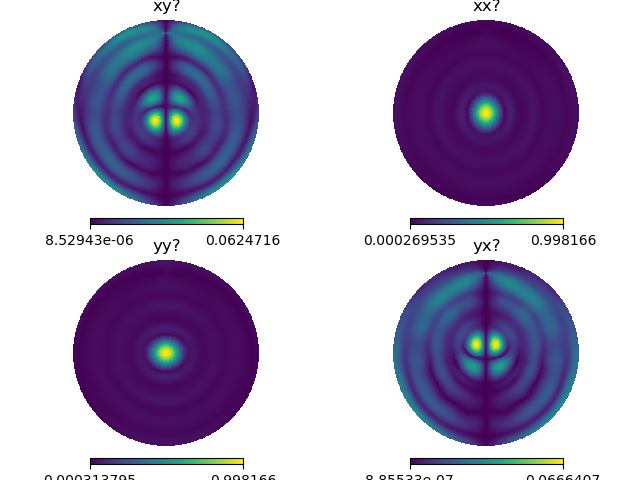

In [12]:
az = phi
alt = np.pi/2 - theta

print(az)
print(alt)

project_J(spline_beam_func(150e6, alt, az))

#alt = target_altaz[0][0]
#az = target_altaz[0][1]

In [11]:
alt = np.array([target_altaz[0][0]])
az = np.array([target_altaz[0][1]])
J = spline_beam_func(150e6, alt, az)
print(J)

[[[-0.00101699+0.00014329j -0.03303644-0.01561633j]
  [-0.02196474-0.02845457j  0.00064101+0.00190876j]]]


In [ ]:
(126.98380198931116, -0.7044659972405023)
(127.0169171081325, -0.7484053931895451)
(127.01484665961006, -0.7456597417283656)
(127.01018851792081, -0.7394817524456158)
(127.02261135989076, -0.7559555489351478)
(127.03089526520557, -0.7669365833813532)
(127.03710925010913, -0.7751715732004072)
(127.04021658202953, -0.7792888153929993)